<a href="https://colab.research.google.com/github/VivianMonzon/Folding_the_Unfoldable/blob/main/2021_11_09_manuscript_plots_scripts_AntiFam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Read Data
df_plddt = pd.read_csv('plddt_seq_length_info_ptm.csv')
df_ptm = pd.read_csv('pTM_seq_length_info.csv')
df_merged = df_ptm.merge(df_plddt, on='Name')

df_plddt = df_plddt[['plDDT mean', 'Sequence length']]
data = df_plddt.values                                                                                                                                                                                                                                    
  

In [2]:
def plot_confidence(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.
       References
    ----------
       [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    ----
    Adapted by https://stackoverflow.com/users/4531270/pylang
    """
    if ax is None:
        ax = plt.gca()
    
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="", label='95% Confidence limit')

    return ax

In [3]:
from scipy.optimize import curve_fit
from numpy import arange
# data sequence length and pLDDT to arrays     
y, x = data[:, 0], data[:, 1]

# Modeling
def equation(x, a, b, c):
    return a * np.exp(-b * x) + c


In [4]:
#Calculating parameters and covariance from fitting input data:
p, cov = curve_fit(equation, x, y)
a_expo, b_expo, c_expo = p

# Generating x values and calculating corresponding y values 
# with model using the fit parameters for curve plotting:
x_line = np.linspace(start=min(x), stop=max(x), num=y.size)
y_model = equation(x_line, a_expo, b_expo, c_expo)

# Statistics and Estimates of Error in Data/Model:
# Adapted from https://stackoverflow.com/users/4531270/pylang
# https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot
n = y.size
m = p.size
dof = n - m
t = stats.t.ppf(0.975, n - m)
resid = y - y_model                           
chi2 = np.sum((resid / y_model)**2)
chi2_red = chi2 / dof
s_err = np.sqrt(np.sum(resid**2) / dof)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


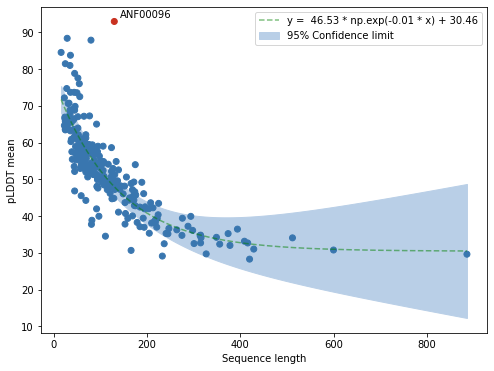

In [5]:
# Plot1: Fitted curve to antifam data 
fig, ax = plt.subplots(figsize=(8, 6))

# Plot fitted curve:
ax.plot(x_line, y_model, "--", color="green", linewidth=1.5, alpha=0.5, 
        label='y =  %.2f * np.exp(-%.2f * x) + %.2f' % (
                a_expo, b_expo, c_expo))

# Confidence Interval
x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(x2, a_expo, b_expo, c_expo)
plot_confidence(t, s_err, n, x, x2, y2, ax=ax)

#function to colour outliers (here ANF00096):
def pltcolor(lst):
  cols = []
  for l in lst:
    if l >= 90:
      cols.append('#c93120')
    else:
      cols.append('#3976af')
  return cols


#Scatterplot for antifam sequences on top of confidence: 
cols = pltcolor(y) # outliers (here: ANF00096) in red
ax.scatter(x, y, c=cols)

#text and axes etc.:
ax.legend()
plt.xlabel('Sequence length')
plt.ylabel('pLDDT mean')
plt.text(142.0, 94.0, 'ANF00096')

plt.savefig('2021-11-09-plDDT_vs_seq_len.png', dpi=900)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


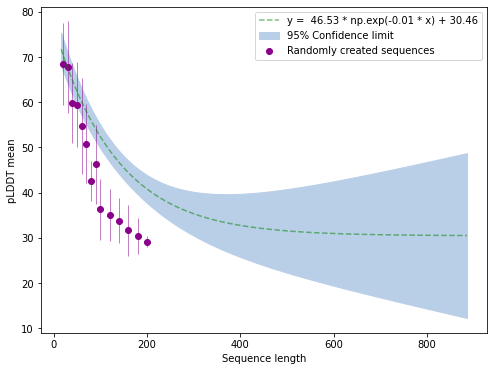

In [6]:
# Plot2: Plotting random sequences on fitted curve:
fig, ax = plt.subplots(figsize=(8, 6)) 

# Plot fitted curve:
ax.plot(x_line, y_model, "--", color="green", linewidth=1.5, alpha=0.5, 
        label='y =  %.2f * np.exp(-%.2f * x) + %.2f' % (
                a_expo, b_expo, c_expo))

# Confidence Interval
x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(x2, a_expo, b_expo, c_expo)
plot_confidence(t, s_err, n, x, x2, y2, ax=ax)


# Random seqs data:
# 5 seqs per length run with ptm model on codon cluster
x_random = np.array([20,30,40,50,60,70,80,90,100,120,140,160,180,200])
y_random = np.array([68.4, 67.69, 59.77, 59.44, 54.77, 50.84, 42.56, 46.26, 36.3, 35.12, 33.78, 31.71, 30.36, 29.17])
std_plddt = np.array([9.07, 10.16, 8.84, 9.34, 10.64, 8.71, 4.38, 8.66, 6.69, 5.79, 4.94, 5.66, 3.94, 1.15])

# plot random sequences:
ax.scatter(x_random, y_random, c='darkmagenta', label='Randomly created sequences')
plt.errorbar(x_random, y_random, std_plddt, linestyle='None', linewidth=0.5, c='darkmagenta')#, label='Std.')

#text and axes etc.:
ax.legend()
plt.xlabel('Sequence length')
plt.ylabel('pLDDT mean')

plt.savefig('2021-11-09-plDDT_vs_seq_len_random_seqs.png', dpi=900)

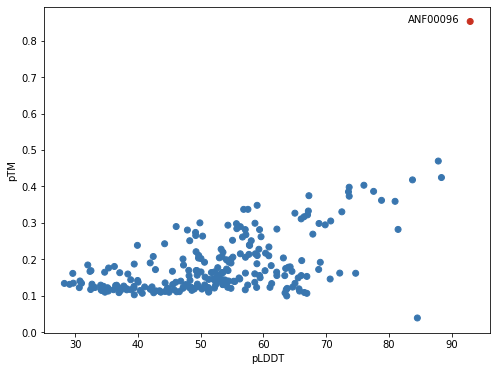

In [7]:
#Plot 3: Plot pLDDT against pTM scores

#function to colour outliers (here ANF00096):
def pltcolor_ptm(lst):
    cols = []
    for k in lst:
        if k >= 0.8:
            cols.append('#c93120')
        else:
            cols.append('#3976af')
    return cols

# get pTM and pLDDT values
df_merged = df_merged[['pTM', 'plDDT mean']]
data = df_merged.values
y, x = data[:, 0], data[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))
cols = pltcolor_ptm(y)
ax.scatter(x, y, c=cols)

plt.ylabel('pTM')
plt.xlabel('pLDDT')
plt.text(83.0, 0.85, 'ANF00096')

plt.savefig('2021-11-09-plDDT_vs_pTM.png', dpi=900)

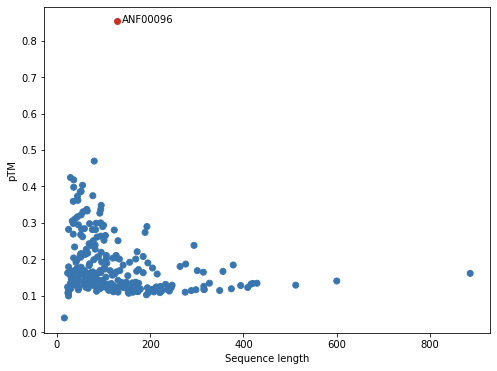

In [8]:
#Plot 4: Plot pTM score against sequence length

df_ptm = df_ptm[['pTM', 'Sequence length']]
data = df_ptm.values
y, x = data[:, 0], data[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))
cols = pltcolor_ptm(y)
ax.scatter(x, y, c=cols)

plt.xlabel('Sequence length')
plt.ylabel('pTM')
plt.text(140.0, 0.85, 'ANF00096')

plt.savefig('2021-11-09-pTM_vs_seq_length.png', dpi=900)